In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [19]:
# Read data, get dataframe with crimes/month
df = pd.read_parquet('C:\\Users\\20203697\\Desktop\\JBG050_DC2\\DBL2_data\\cleaned\\Metropolitan-street.parquet')
monthly_grouped_df = df.sort_values(['Year','Month num'],ascending=False).groupby(['Year', 'Month num'])['Crime ID'].count()
monthly_grouped_df = monthly_grouped_df.to_frame()

# Rename columns, select rows with data and set datetime index
monthly_grouped_df = monthly_grouped_df.rename(columns = {'Crime ID':'nr of burglaries'})
monthly_grouped_df['day'] = 1
monthly_grouped_df = monthly_grouped_df.reset_index()
monthly_grouped_df = monthly_grouped_df[(monthly_grouped_df['Year']>2011) | ((monthly_grouped_df['Year'] == 2011) & (monthly_grouped_df['Month num']==12))]
monthly_grouped_df = monthly_grouped_df.rename(columns={'Month num': 'month', 'Year': 'year'})
monthly_grouped_df['Date'] = pd.to_datetime(monthly_grouped_df[['year', 'month', 'day']])
monthly_grouped_df = monthly_grouped_df.set_index(pd.DatetimeIndex(monthly_grouped_df['Date']))

In [20]:
# Divide test and train data
train_data = monthly_grouped_df[monthly_grouped_df['year']<2018]
test_data = monthly_grouped_df[(monthly_grouped_df['year']>2017) & (monthly_grouped_df['year'] <2020)]

test_data

,year,month,nr of burglaries,day,Date
Date,,,,,
2018-01-01,2018,1,328,1,2018-01-01
2018-02-01,2018,2,292,1,2018-02-01
2018-03-01,2018,3,319,1,2018-03-01
2018-04-01,2018,4,317,1,2018-04-01
2018-05-01,2018,5,302,1,2018-05-01
2018-06-01,2018,6,271,1,2018-06-01
2018-07-01,2018,7,275,1,2018-07-01
2018-08-01,2018,8,275,1,2018-08-01
2018-09-01,2018,9,243,1,2018-09-01


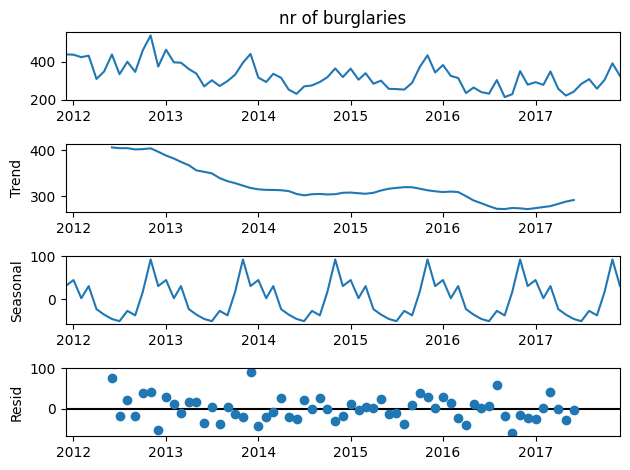

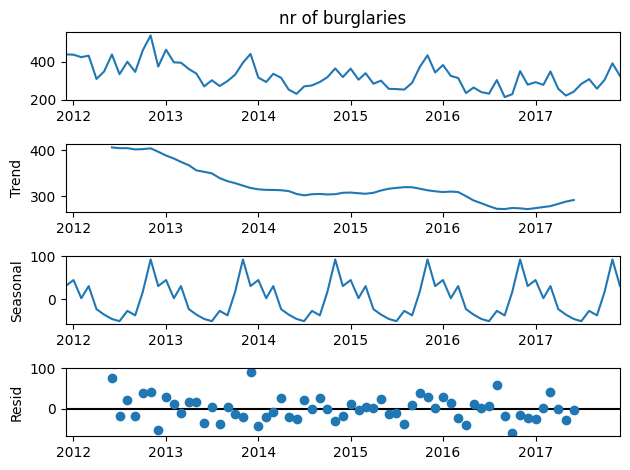

In [21]:
# Decompose the nr of burglaries into average, trends and seasonality
decompose_result = seasonal_decompose(train_data['nr of burglaries'], model='additive', period=12)
decompose_result.plot()

In [22]:
from sklearn.metrics import mean_squared_error
import math

C:\Users\20203697\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\20203697\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


39.34315306562538

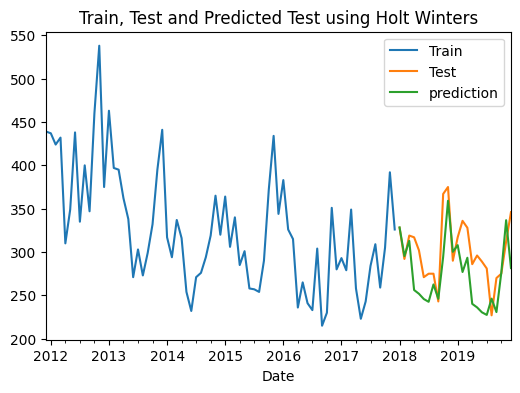

In [24]:
# Fit the model & make predictions
fitted_model = ExponentialSmoothing(train_data['nr of burglaries'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24).to_frame()

# Plot test data, train data and predictions
train_data['nr of burglaries'].plot(legend=True,label='Train')
test_data['nr of burglaries'].plot(legend=True,label='Test',figsize=(6,4))
test_predictions[0].plot(legend=True,label='prediction')
plt.title('Train, Test and Predicted Test using Holt Winters')

mse = mean_squared_error(test_data['nr of burglaries'], test_predictions)
math.sqrt(mse)

Prophet model: 


ModuleNotFoundError: No module named 'fbprophet'